## 1335. Minimum Difficulty of a Job Schedule

### Top Down

In [5]:
jobDifficulty = [6,5,4,  3,2,1]
d = 2


In [18]:
jobDifficulty = [1,1,1]
d = 3


In [19]:
from functools import cache

class Solution:
    def minDifficulty(self, jobDifficulty: List[int], d: int) -> int:

        n = len(jobDifficulty)

        cache = {}
        def countDifficulty(i, d):
            cache_key = (i,d)
            if cache_key in cache: return cache[cache_key]
            tasksLeft = n - i
            if tasksLeft < d: return -1
            
            assert not (d <= 0 and tasksLeft > 0)
            if i >= n: return 0
            minTasksToday = 1 if d != 1 else tasksLeft

            doNotTouchQuota = d - 1
            maxTasksToday = tasksLeft - doNotTouchQuota #

            bestCost = float('inf')
            for tasksToday in range(minTasksToday, maxTasksToday+1):
                # print(f'{i=} {tasksToday=}')
                todaysCost = max(jobDifficulty[i:i+tasksToday])
                tailCost = countDifficulty(i+tasksToday, d-1)
                bestCost = min(bestCost, todaysCost + tailCost)
            cache[cache_key] = bestCost
            return bestCost

        return countDifficulty(0, d)


3

In [31]:
import torch

jobDifficulty = torch.randint(low=0, high=1000, size=(200,))
d = 10


In [34]:
n = len(jobDifficulty)

cache = {}
def countDifficulty(i, d):
    cache_key = (i,d)
    if cache_key in cache: return cache[cache_key]
    tasksLeft = n - i
    if tasksLeft < d: return -1
    
    assert not (d <= 0 and tasksLeft > 0)
    if i >= n: return 0
    minTasksToday = 1 if d != 1 else tasksLeft

    doNotTouchQuota = d - 1
    maxTasksToday = tasksLeft - doNotTouchQuota #

    bestCost = float('inf')
    for tasksToday in range(minTasksToday, maxTasksToday+1):
        # print(f'{i=} {tasksToday=}')
        todaysCost = max(jobDifficulty[i:i+tasksToday])
        tailCost = countDifficulty(i+tasksToday, d-1)
        bestCost = min(bestCost, todaysCost + tailCost)
    cache[cache_key] = bestCost
    return bestCost

countDifficulty(0, d)


tensor(3063)

In [33]:
len(cache)


1720

### Bottom Up

In [35]:
jobDifficulty = [6,5,4,  3,2,1]
d = 2


## 70. Climbing Stairs

### Memoization

In [157]:
from functools import cache

@cache
def climbStairs(n):
    if n < 0: return 0
    if n == 0: return 1
    
    return climbStairs(n-1) + climbStairs(n-2)


In [159]:
climbStairs(3), climbStairs(2)


(3, 2)

### Bottom-Up

In [167]:
n = 3


In [168]:
dp = [0, 1]
m = 0

while m != n:
    
    nextFib = sum(dp)
    
    dp[0] = dp[1]
    dp[1] = nextFib
    
    m += 1

dp[1]


3

## 91. Decode Ways

Goals:

 - [x] Solve Fibonacci with O(1) memory

 - [x] Solve in O(1) memory

 - [x] Solve Decode Ways II

### Fibonacci


In [30]:
def bruteFib(n):
    if n < 2: return n
    
    return bruteFib(n-1) + bruteFib(n-2)


In [41]:
def fib(n):
    if n < 2: return n

    train_vec = [0,1]
    i = 1

    while i < n:
        
        # F_inext = 
        F_iprev = train_vec[0]
        F_icurr = train_vec[1]
        F_inext = F_iprev + F_icurr

        i+=1

        train_vec[0] = F_icurr
        train_vec[1] = F_inext

    return train_vec[1]
    

In [43]:
for n in range(10):
    assert bruteFib(n) == fib(n)


In [2]:
from functools import cache

@cache
def numDecodings(s, i=0):
    n = len(s)

    if n == i: return 1
    if s[i] == '0': return 0
    if i == (n - 1): return 1

    r = numDecodings(s, i+1)

    if s[i] == '1' or ( s[i] == '2' and s[i+1] not in '789' ):
        r += numDecodings(s, i+2)
    return r


In [ ]:
def numDecodings(s, i=0):
    n = len(s)

    if n == i: return 1
    if s[i] == '0': return 0
    if i == (n - 1): return 1

    r = numDecodings(s, i+1)

    if s[i] == '1' or ( s[i] == '2' and s[i+1] not in '789' ):
        r += numDecodings(s, i+2)
    return r


In [44]:
numDecodings('261105')


2

In [5]:
numDecodings('127')


2

In [20]:
numDecodings('06'), numDecodings('226'), numDecodings('12')


(0, 3, 2)

In [14]:
numDecodings('2611055971756562')


4

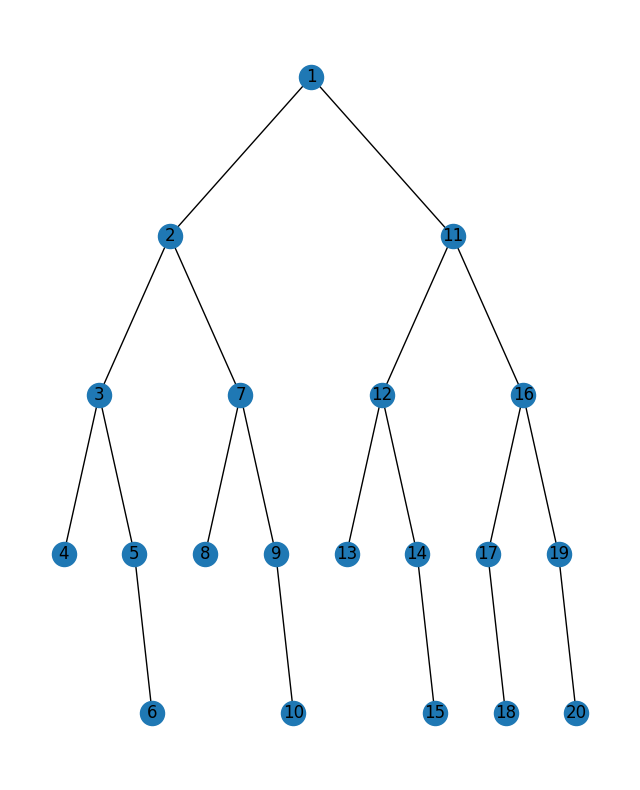

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
    def __repr__(self): return f'TreeNode({self.val}, left={self.left}, right={self.right})'

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    pos[node.val] = (x, y)
    if node.left:
        graph.add_edge(node.val, node.left.val)
        l = x - 1 / 2**layer
        add_edges(graph, node.left, pos, l, y - 1, layer + 1)
    if node.right:
        graph.add_edge(node.val, node.right.val)
        r = x + 1 / 2**layer
        add_edges(graph, node.right, pos, r, y - 1, layer + 1)

def createTree(currentNode, currentNum, maxNum):
    if currentNum < maxNum:
        leftNum = currentNum + 1
        rightNum = leftNum + (maxNum - currentNum) // 2
        currentNode.left = TreeNode(val=leftNum)
        currentNode.right = TreeNode(val=rightNum)
        createTree(currentNode.left, leftNum, rightNum - 1)
        createTree(currentNode.right, rightNum, maxNum)

def visualize_tree(root):
    graph = nx.DiGraph()
    pos = {}
    add_edges(graph, root, pos)
    fig, ax = plt.subplots(figsize=(8, 10))
    nx.draw(graph, pos, with_labels=True, arrows=False)
    plt.show()

# Example usage:
root = TreeNode(val=1)
createTree(root, 1, 20)
visualize_tree(root)



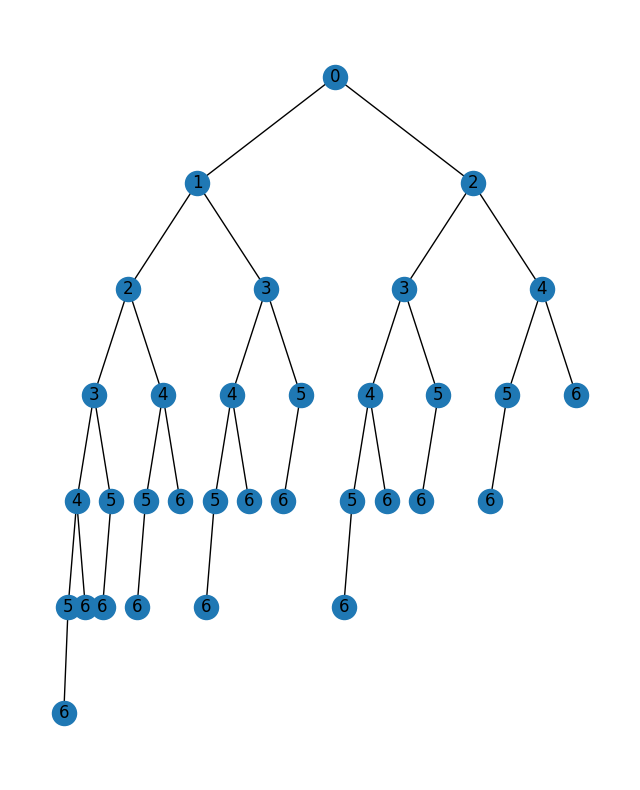

In [45]:
N = 6


def create91Tree(root, i):
    if i >= N: return

    root.left = TreeNode(i+1)
    create91Tree(root.left, i+1)
    
    if (i + 2 <= N):
        root.right = TreeNode(i+2)
        create91Tree(root.right, i+2)

root = TreeNode(val=0)
create91Tree(root, 0)

def draw_unique_tree(root):
    graph = nx.DiGraph()
    pos = {}
    labels = {}
    def add_unique_edges(graph, node, pos, labels, x=0, y=0, layer=0):
        if node is None:
            return
        pos[node] = (x, y)
        labels[node] = node.val
        if node.left:
            graph.add_edge(node, node.left)
            l = x - 1 / 2**layer
            add_unique_edges(graph, node.left, pos, labels, l, y - 1, layer + 1)
        if node.right:
            graph.add_edge(node, node.right)
            r = x + 1 / 2**layer
            add_unique_edges(graph, node.right, pos, labels, r, y - 1, layer + 1)
    add_unique_edges(graph, root, pos, labels)
    fig, ax = plt.subplots(figsize=(8, 10))
    nx.draw(graph, pos, labels=labels, with_labels=True, arrows=False)
    plt.show()

draw_unique_tree(root)

# visualize_tree(root)


## 

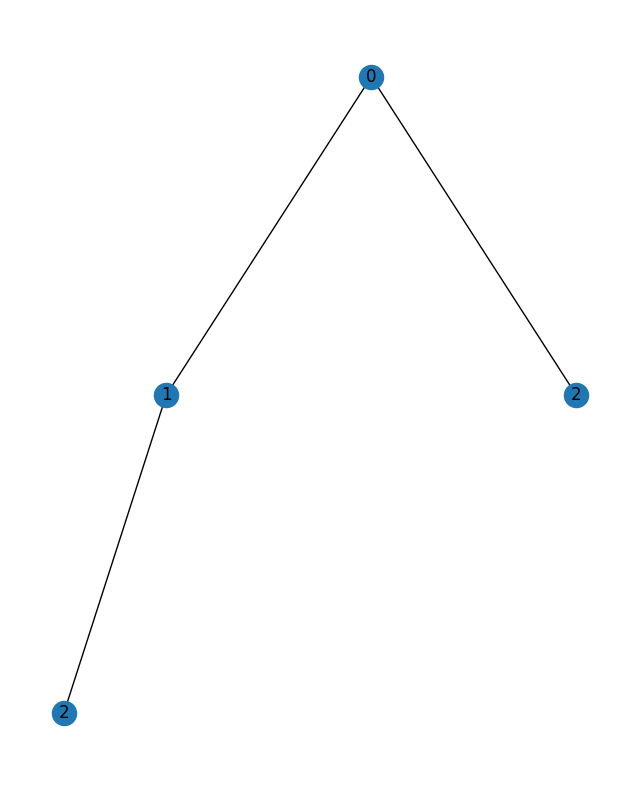

In [48]:
N = 2
root = TreeNode(val=0)
create91Tree(root, 0)
draw_unique_tree(root)


In [49]:
s = '11106'


In [105]:
def options_1(c):
    if c == '0': return 0
    if c == '*': return 9
    return 1


def options_2(c):
    if c == '**': return 15

    a,b = c


    if a == '*':
        if b in '0123456': return 2
        return 1

    if a not in '12': return 0

    if b == '*':
        if a == '1': return 9
        if a == '2': return 6
    
    if a == '1': return 1
    
    if b in '789': return 0
    
    return 1


In [106]:
options_2('1*'), options_2('2*'), options_2('**')


(9, 6, 15)

In [107]:
options_2('06'), options_2('26'), options_2('27'), options_2('17'), options_2('2*')


(0, 1, 0, 1, 6)

In [109]:
s = '2*'

i = len(s) - 1


train_vec = [0,1]

while i >= 0:
    r,l = train_vec
    
    train_vec[0] = train_vec[1]
    train_vec[1] = 0
    
    if r != 0:
        train_vec[1] += r * options_2(s[i:i+2])
    if l != 0:
        train_vec[1] += l * options_1(s[i])
    
    i -= 1

train_vec[1]


15

In [ ]:
# if len(s) < 2:


# 1155. Number of Dice Rolls With Target Sum

In [118]:
from functools import cache


@cache
def numRollsToTarget(n: int, k: int, target: int):
    if (target > n * k) or target < n: return 0

    if n == 1:
        if target < 1 or target > k: return 0
        return 1

    result = numRollsToTarget(n-1, k, target-rolled)
    return result % (10**9 + 7)


In [119]:
numRollsToTarget(n = 1, k = 6, target = 3), numRollsToTarget(n = 2, k = 6, target = 7)


(1, 6)

In [120]:
numRollsToTarget(n = 30, k = 30, target = 500)


222616187

## 1578. Minimum Time to Make Rope Colorful

In [126]:
colors = "abc"
neededTime = [1,2,3]


In [123]:
colors = "abaac"
neededTime = [1,2,3,4,5]


In [148]:
colors = "bbbaaa"
neededTime = [4,9,3,8,8,9]


In [152]:
sum(neededTime) - 18


23

In [156]:
total_time = 0
i = 0
while i < len(colors) - 1:
    if colors[i] == colors[i+1]:
        local_min = neededTime[i]
        local_total = local_min
        j = i + 1

        while j < len(colors) and colors[j] == colors[j-1]:

            local_total += neededTime[j]
            local_min = max(local_min, neededTime[j])
            j += 1

        i = j-1
        total_time += local_total - local_min
    i += 1
total_time


23

In [131]:
local_min


8

## 1531. String Compression II

In [169]:
s = "aaabcccd"


In [177]:
def encode(s):
    result = []
    i = 0

    while i < len(s):
        groupLen = 1

        while (i + groupLen < len(s)) and (s[i] == s[i + groupLen]):
            groupLen += 1

        result.append((s[i], groupLen))
        i = i + groupLen

    return result

def strRepr(encoded):
    return ''.join([(char if count == 1 else f'{char}{count}') for char, count in encoded])


In [178]:
print(encode('aab'))
print(encode('aabbac'))

print(strRepr ( encode('aabbac') ) )


[('a', 2), ('b', 1)]
[('a', 2), ('b', 2), ('a', 1), ('c', 1)]
a2b2ac


In [182]:
e = encode('aabbac')
e


[('a', 2), ('b', 2), ('a', 1), ('c', 1)]

In [184]:
k = 3


First attempt:

 1. Operate in a space of encoded string
 2. Recursive function returns min length of a string for a given budget
    1. Base case: you can't remove anything, return current length
    2. Loop through your level of possibilities, calculate every to the deepest level, return the min

Coding function to iterate over decrease possibilities:

1. When you del (n-1) to get rid of digit: decrease by 1
2. When go from two digit to single digit: decrease by 1 with a price of n - 9
3. When you del     n chars:
   1. You decrease by 1 + len(n)
   2. MERGE possibility


In [203]:
[i+1]


[3]

In [237]:
def encode(s):
    result = []
    i = 0

    while i < len(s):
        groupLen = 1

        while (i + groupLen < len(s)) and (s[i] == s[i + groupLen]):
            groupLen += 1

        result.append((s[i], groupLen))
        i = i + groupLen

    return tuple(result)


def deleteAt(e, i):
    options = []

    c,n = e[i]

    if n != 1:
        options.append( (n-1, e[:i] + ((c,1),) + e[i+1:] ) )
        
    if n > 9:
        options.append( (n-9, e[:i] + ((c,9),) + e[i+1:] ) )


    should_merge_occur = (i > 0 and i < len(e) - 1) and (e[i-1][0] == e[i+1][0])

    if should_merge_occur:
        newChar = (e[i-1][0], e[i-1][1] + e[i+1][1])
        options.append(
            (n, 
            e[:i-1] + (newChar,) + e[i+2:]
            )
        )
    else:
        options.append( (n, e[:i] + e[i+1:] ) )

    return options

from functools import cache


@cache
def getOptimalLength(e, k):
    length = sum(1 if c == 1 else len(str(c))+1 for _,c in e)
    minLength = length

    for i in range(len(e)):
        options = deleteAt(e, i)
        
        for price, new_e in options:
            if k >= price:
                currentPrice = getOptimalLength(new_e, k - price)
                minLength = min(minLength, currentPrice)

    return minLength


In [238]:
s = "llllllllllttttttttt"
e = encode(s)
k = 1
print(e)

getOptimalLength(e, 1)


(('l', 10), ('t', 9))


4

In [236]:
length = sum(1 if c == 1 else len(str(c))+1 for _,c in e)
minLength = length

deleteAt(e, 0)


[(9, [('l', 1), ('t', 9)]), (1, [('l', 9), ('t', 9)]), (10, [('t', 9)])]

In [ ]:
n = 10


In [183]:
length = sum(l for _,l in e)

for i, (c,price) in enumerate(e):
    if k >= price:
        new_length = length - price
        
        if (i > 0 and i < len(e) - 1) and e[i-1][0] == e[i+1][0]:
            

SyntaxError: invalid syntax (107474621.py, line 3)

In [179]:
class RunLenghtEncoder:
    def __init__(self, s):
        # self.s = s
        self.encoded = encode(s)


In [239]:
# 4 parameters:

# 1. i
# 2. k
# 3. prev char
# 4. prevCount


In [250]:
s = "aaabaaad"
k = 2


In [251]:
cache = {}

def count(i, k, prev, prev_count):
    if (i, k, prev, prev_count) in cache:
        return cache[(i, k, prev, prev_count)]
    if k < 0: return 999

    if i == len(s): return 0

    if prev == s[i]:
        incr = 1 if prev_count in [1,9,99] else 0
        res = incr + count(i+1, k, prev, prev_count+1)
    else:
        do_del = count(i+1, k-1, prev, prev_count)
        do_not_del = count(i+1, k, s[i], 1)
        
        res = min(do_del, do_not_del)
    cache[(i, k, prev, prev_count)] = res
    return res


count(0, k, '', 1)


1